#### Name : Harsh Patil   

#### Assignment : Hypothesis Testing

### Q1. A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutletswas collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.(Minitab File : Cutlets.mtw)

#### Solution:


To analyze whether there is a significant difference in the diameter of the cutlet between two units, we can perform a two-sample t-test. This is because there are two groups to compare and not more than two groups. 

To check the normality assumption, we can create histograms and normal probability plots for each unit.

#### Step 1: Set up the null and alternative hypothesis

Using the method of null hypothesis and alternative hypothesis,

Null Hypothesis is when μ1=μ2=μ3=μ4

Null Hypothesis is that there is no significant difference between the diameter of cutlets between two units.

Alternative Hypothesis is when μ1≠μ2≠μ3≠μ4

Alternative Hypothesis is that there is a significant difference between the diameter of cutlets between two units.

This a two-tailed hypothesis test.
Decieding a cut off value 
Level of Significance = 5 % 
i.e alpha =0.05


As the test is a two-tailed test, 
alpha/2=0.025

In [5]:
#Checking if there are any null values
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [7]:
#This command will show calculate the parameters of statistics related to the dataset cutlets
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [9]:
#Showing the number of columns , types of data types and the null values present 
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


#### Plotting Histograms

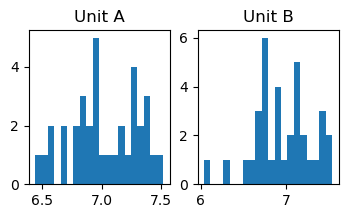

In [94]:
#Creating subplots within a single plot
#fig,axs=plt.subplots(rows,columns,figsize=(width,height)) 
#Width and height are in inches
#This returns a figure object (fig) and an array of axes objects (axs)
fig, axs = plt.subplots(1, 2, figsize=(4,2))
#On 1,1 position, we plot histogram of Unit A
axs[0].hist(cutlets['Unit A'], bins=20)
#Setting the title of the histogram of Unit A
axs[0].set_title('Unit A')
#On 1,2 position, we plot histogram of Unit B
axs[1].hist(cutlets['Unit B'], bins=20)
#Setting the title of the histogram of Unit A
axs[1].set_title('Unit B')
plt.show()

#### Plotting Boxplot

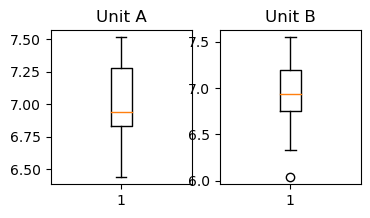

In [95]:
#Creating subplots within a single plot
#fig,axs=plt.subplots(rows,columns,figsize=(width,height)) 
#Width and height are in inches
#This returns a figure object (fig) and an array of axes objects (axs)
fig, axs = plt.subplots(1, 2, figsize=(4,2))
#On 1,1 position, we plot boxplot of Unit A
axs[0].boxplot(cutlets['Unit A'])
#Setting the title of the boxplot of Unit A
axs[0].set_title('Unit A')
#On 1,2 position, we plot boxplot of Unit B
axs[1].boxplot(cutlets['Unit B'])
#Setting the title of the  boxplot of Unit B
axs[1].set_title('Unit B')
plt.show()

#### Plotting Distribution Plot

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


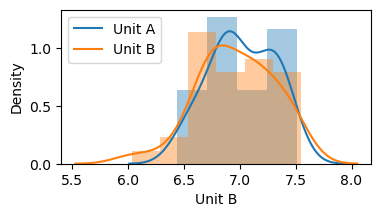

In [96]:
#figure_name = plt.figure(figsize=(width, height))
plt.figure(figsize = (4,2))
#Labels indicating graph
labels = ['Unit A', 'Unit B']
#Plotting distribution plot with help of sns
#Plotting density plot by keeping kde true
sns.distplot(cutlets['Unit A'], kde = True)
#Plotting density plot by keeping hist true
sns.distplot(cutlets['Unit B'],hist = True)
plt.legend(labels)

#### Step 2:  Performing the Normality test and Homogeneity of variance assumption check

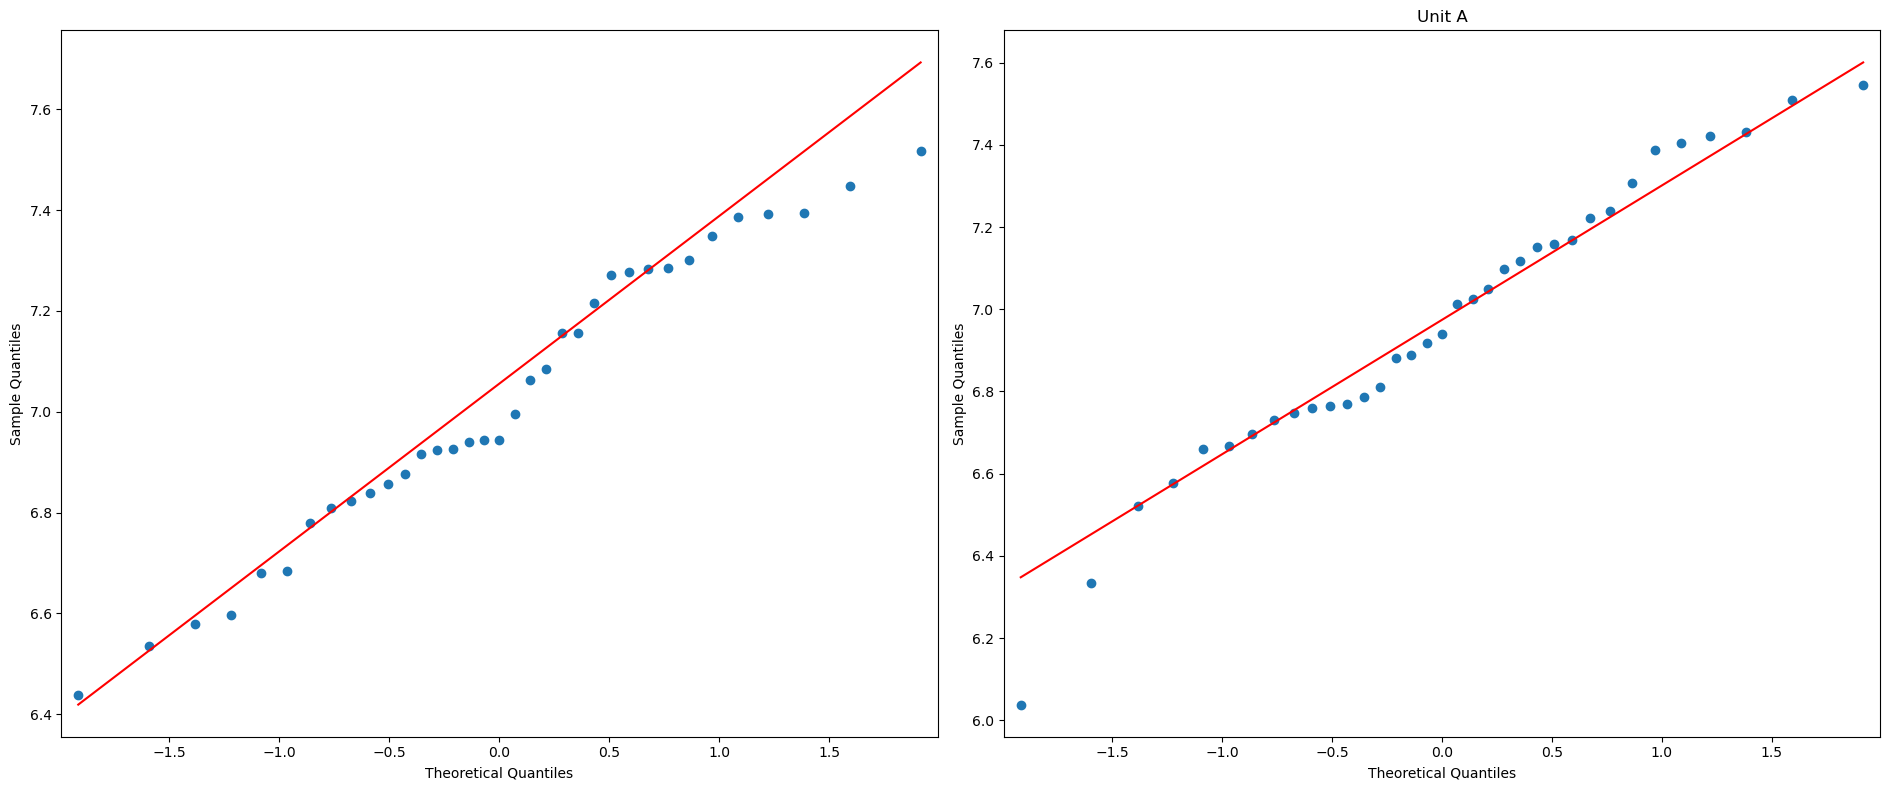

In [1]:
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cutlets = pd.read_csv('Cutlets.csv')
#Displaying first 10 columns of the dataset cutlets
cutlets.head(10)
#Displaying last 10 columns of the dataset cutlets
cutlets.tail(10)
figure, axes = plt.subplots(1, 2, figsize=(19,8))
plt.title('Unit A')
sm.qqplot(cutlets["Unit A"], line='q', ax = axes[0])
plt.title('Unit A')
sm.qqplot(cutlets["Unit B"], line='q', ax = axes[1]) 
plt.tight_layout()
plt.show()

The Q-Q plot shows a largely straight-line pattern if it is from a normal distribution. From the above figure, we may assume that the data for each group falls roughly on a straight line.

In [6]:
std1=cutlets['Unit A'].std()
print('Standard Deviation of Unit A:',std1)
std2=cutlets['Unit B'].std()
print('Standard Deviation of Unit B:',std2)
#From above we can see that the lowest std is  0.2884084841815496 and the highest std is 0.343400647063108
#Hence removing the ratio of both the quantities
Ratio=std2/std1
R=float(Ratio)
print('Ratio:',R)


Standard Deviation of Unit A: 0.2884084841815496
Standard Deviation of Unit B: 0.343400647063108
Ratio: 1.1906745671425587


From above we can see that the lowest std is  0.2884084841815496 and the highest std is 0.343400647063108.

The ratio of the highest value of standard deviation to the lowest value of standard deviation.
Hence removing the ratio of both the quantities
As the ratio calculated is less than the threshold of 2, we conclude that the assumptions are fullfilled.

#### Step 3: Calculating the t statistic and p-value of the dataset

In [33]:
#Level of Significance
alpha=0.05
t_statistic, p_value = stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'], alternative='two-sided')
print('The value of t-statistic is:', t_statistic)
print('The value of p is:', p_value)

if p_value < alpha:
    print('There is no significant difference in the diameter of the cutlet between the two units.')
else:
    print('There is a significant difference in the diameter of the cutlet between the two units.')

The value of t-statistic is: 0.7228688704678063
The value of p is: 0.4722394724599501
There is no significant difference in the diameter of the cutlet between the two units.


#### Step 4:  Conclusion

Ans: If the p-value is less than the chosen significance level (5% in this case), we reject the null hypothesis(H0) and conclude that there is a significant difference in the diameter of the cutlet between the two units. Otherwise, we fail to reject the null hypothesis(H0) and conclude that there is no significant difference in the diameter of the cutlet between the two units.
But, in the above case the value of p is far greater than alpha which is the level of significance. Hence, we accept the alternative hypothesis(H1).
We conclude that there is a significant difference in the diameter of the cutlet between the two units.

### Q.2 A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.(Minitab File: LabTAT.csv)



#### Solution:

The right tailed test and the left tailed test are examples of one-tailed tests. They are called “one tailed” tests because the rejection region (the area where you would reject the null hypothesis) is only in one tail. The two tailed test is called a two tailed test because the rejection region can be in either tail.There are three different types of hypothesis tests:

    Two-tailed test: The alternative hypothesis contains the “≠” sign
    Left-tailed test: The alternative hypothesis contains the “<” sign
    Right-tailed test: The alternative hypothesis contains the “>” sign
    
To analyze the data and determine whether there is any difference in average TAT among the different laboratories at a 5% significance level, we can conduct an Analysis of Variance (ANOVA) test. This is because there are 4 groups to conmpare and in this case analysis of variance method is preferred.There are two elements of ANOVA: Variation within each group. Variation between groups.

#### Step 1 :  Set up the null and alternative hypothesis

Set up the null and alternative hypotheses
We want to test whether there is any significant difference in the average TAT among the four laboratories. 
The null hypothesis(H0) is that there is no difference in the mean TAT among the four laboratories, while the alternative hypothesis(H1) is that there is a significant difference in the mean TAT among at least two of the four laboratories. 

H0: The mean TAT for all the laboratories is the same.
nu1=nu2=nu3=nu4
There is no significant difference between TAT reports of the laboratories.

H1: The mean TAT for all laboratories is different from others.
Atleast one mean of the group is different.
There is a significant difference between TAT reports of the laboratories

This is a two-tailed hypothesis test.

#### Step 2 : Check the assumptions of ANOVA

Before performing the ANOVA test, we need to check the assumptions of normality, equal variances, and independence.

We can check the normality assumption by creating a histogram and a normal probability plot of the data for each laboratory. We can check the equal variance assumption by performing a Levene's test.

#### Step 3 : Performing the Normality test and Homogeneity of variance assumption check

Total number of entries: 480


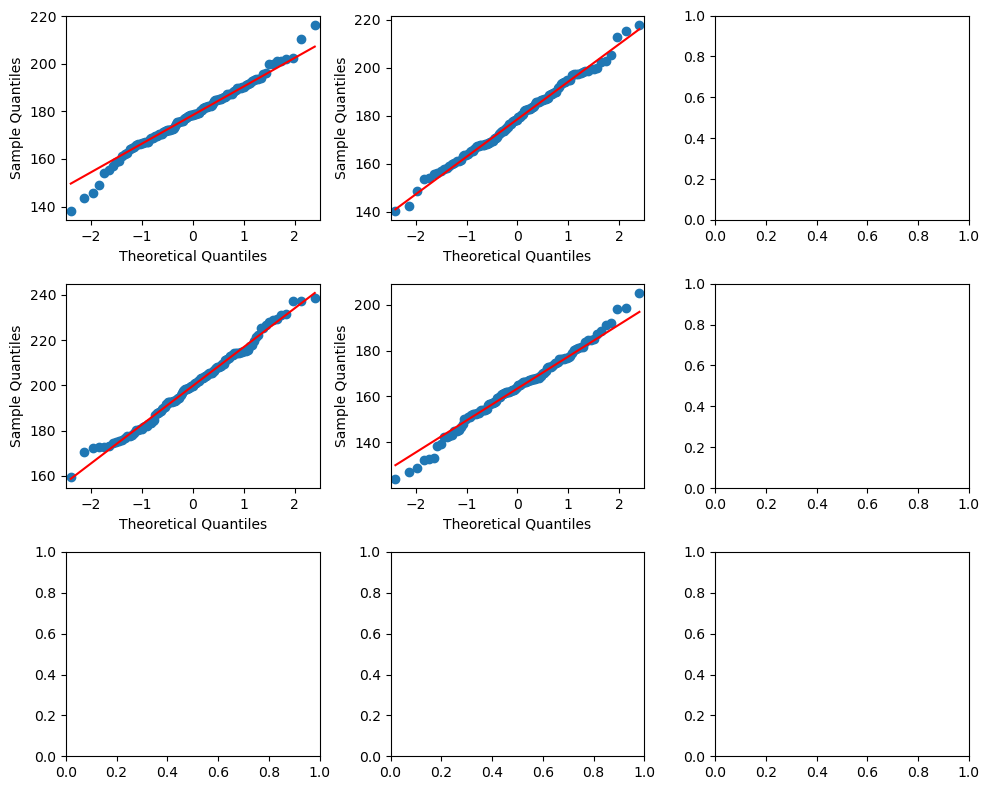

In [8]:
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Labs = pd.read_csv('LabTAT.csv')
# count the number of entries
num_entries = Labs.shape[0] * Labs.shape[1]
# print the result
print("Total number of entries:", num_entries)

#Displaying first 10 columns of the dataset LabTAT
Labs.head(11)
#Displaying last 10 columns of the dataset LabTAT
Labs.tail(11)
figure, axes = plt.subplots(3, 3, figsize=(10,8))
sm.qqplot(Labs["Laboratory 1"], line='q', ax = axes[0, 0])
sm.qqplot(Labs["Laboratory 2"], line='q', ax = axes[0, 1])
sm.qqplot(Labs["Laboratory 3"], line='q', ax = axes[1, 0])
sm.qqplot(Labs["Laboratory 4"], line='q', ax = axes[1, 1])   
plt.tight_layout()
plt.show()

The Q-Q plot shows a largely straight-line pattern if it is from a normal distribution. From the above figure, we may assume that the data for each group falls roughly on a straight line.

In [13]:
Labs = pd.read_csv('LabTAT.csv')
Labs.head(10)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
5,179.45,197.00,181.51,161.12
6,191.37,166.36,214.21,154.02
7,166.81,169.60,183.43,163.25
8,158.81,175.36,191.60,152.79
9,165.88,198.68,208.43,161.98


In [10]:
Labs = pd.read_csv('LabTAT.csv')
Labs.tail(10)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
110,172.05,174.43,211.64,152.31
111,181.88,168.20,183.19,191.26
112,201.11,195.07,203.05,160.98
113,154.21,193.79,197.88,192.23
114,145.89,175.16,203.39,139.34
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87
119,182.09,215.17,221.49,162.21


In [14]:
std1=Labs['Laboratory 1'].std()
std1_mean=Labs['Laboratory 1'].mean()
print('Standard Deviation of Laboratory 1:',std1)
print('Mean of Laboratory 1:',std1_mean)
std2=Labs['Laboratory 2'].std()
std2_mean=Labs['Laboratory 2'].mean()
print('Standard Deviation of Laboratory 2:',std2)
print('Mean of Laboratory 2:',std2_mean)
std3=Labs['Laboratory 3'].std()
std3_mean=Labs['Laboratory 3'].mean()
print('Standard Deviation of Laboratory 3:',std3)
print('Mean of Laboratory 3:',std3_mean)
std4=Labs['Laboratory 4'].std()
std4_mean=Labs['Laboratory 4'].mean()
print('Standard Deviation of Laboratory 4:',std4)
print('Mean of Laboratory 4:',std4_mean)
#From above we can see that the lowest std is 13.17 and the highest std is 16.53
#Hence removing the ratio of both the quantities
Ratio=std3/std1
print('Ratio:',Ratio)
#As the ratio calculated is less than the threshold of 2, we conclude that the assumptions are fullfilled

Standard Deviation of Laboratory 1: 13.173593589458577
Mean of Laboratory 1: 178.36158333333336
Standard Deviation of Laboratory 2: 14.957113728438193
Mean of Laboratory 2: 178.9029166666667
Standard Deviation of Laboratory 3: 16.539032831329596
Mean of Laboratory 3: 199.91324999999998
Standard Deviation of Laboratory 4: 15.08507977671142
Mean of Laboratory 4: 163.68275
Ratio: 1.2554685795502316


In [ ]:
#Inference is that it lands near the mean

#### Step 4 : Hypothesis Testing

In [67]:
No_of_groups=4
#Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

#Calculating mean
x_bar1 = Labs['Laboratory 1'].mean()
x_bar2 = Labs['Laboratory 2'].mean()
x_bar3 = Labs['Laboratory 3'].mean()
x_bar4 = Labs['Laboratory 4'].mean()

#Calculating the Grand Mean
x_bar=(x_bar1+x_bar2+x_bar3+x_bar4)/4


print('The Mean of Laboratory 1 is :',x_bar1)
print('The Mean of Laboratory 2 is :',x_bar2)
print('The Mean of Laboratory 3 is :',x_bar3)
print('The Mean of Laboratory 4 is :',x_bar4)
print('The Grand Mean is :',x_bar)


#Calculate Sum of Squares between groups and update the anova table
SSB1 = Labs['Laboratory 1'].count() * (x_bar1 - x_bar)**2
SSB2 = Labs['Laboratory 2'].count() * (x_bar2 - x_bar)**2
SSB3 = Labs['Laboratory 3'].count() * (x_bar3 - x_bar)**2
SSB4 = Labs['Laboratory 4'].count() * (x_bar4 - x_bar)**2
#Sum of Squares between groups
SSB=SSB1+SSB2+SSB3+SSB4
anova_table['SS']['Between Groups'] = SSB


SSE1 = 0
for row in range(len(Labs['Laboratory 1'])):
         SSE1 += (Labs['Laboratory 1'][row] - x_bar1)**2

SSE2 = 0
for row in range(len(Labs['Laboratory 2'])):
         SSE2 += (Labs['Laboratory 2'][row] - x_bar2)**2


SSE3 = 0
for row in range(len(Labs['Laboratory 3'])):
         SSE3 += (Labs['Laboratory 3'][row] - x_bar1)**2

SSE4 = 0
for row in range(len(Labs['Laboratory 4'])):
         SSE1 += (Labs['Laboratory 4'][row] - x_bar1)**2

SSE=SSE1+SSE2+SSE3+SSE4
anova_table['SS']['Within Groups'] = SSE

#Calculate SSTR and update anova table
SSTR = SSB + SSE
anova_table['SS']['Total'] = SSTR

#Update degree of freedom

#df between groups= k-1
anova_table['df']['Between Groups'] =  No_of_groups-1
#df within groups= N-k
anova_table['df']['Within Groups'] = num_entries-No_of_groups
#df total = N-1
anova_table['df']['Total'] = num_entries - 1

#Calculate Mean Square between groups and mean square within the groups
anova_table['MS'] = anova_table['SS'] / anova_table['df']

#Calculate F-Ratio
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F


#Calculating p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

#Calculating the value of F critical 
#Assuming that the level of significance is 0.05
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

The Mean of Laboratory 1 is : 178.36158333333339
The Mean of Laboratory 2 is : 178.9029166666668
The Mean of Laboratory 3 is : 199.91325000000003
The Mean of Laboratory 4 is : 163.6827499999999
The Grand Mean is : 180.21512500000006


,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,79979.167089,3,26659.722363,67.321922,0.0,3.143609
Within Groups,188497.707,476,396.003586,,,
Total,268476.874089,479,560.494518,,,


From the above table, we can observe that F-ratio is 67.321922 and that of F critical is 3.143.
The value of F ratio is far greater than that of F critical. Hence, we reject the null hypothesis (H0) and accept alternative hypothesis(H1).

F-Ratio > F critical Value

Also, after observing the value of p , it comes to 0.000 which is less than that of the level of significance(alpha=0.05).
Hence, we reject the null hypothesis (H0) and accept the alternate hypothesis (H1)

alpha > p-value

H1: The mean TAT for all laboratories is different from others.
Atleast one mean of the group is different.
There is a significant difference between TAT reports of the laboratories.


#### Step 5 :  Performing ANNOVA Test ( Alternative Method)

In [69]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
#Extracting the csv file using pandas into the data variable
#Calculating the F-statistic value and the p-value
data = pd.read_csv('LabTAT.csv')
F, p = stats.f_oneway(data['Laboratory 1'], data['Laboratory 2'], data['Laboratory 3'], data['Laboratory 4'],axis=0)
print('F-statistic:', F)
print('p-value:', p)
#Calculating the Fc i.e the F value
#For calculating F-Critical value scipy.stats provide us scipy.stats.f.ppf(q,dfn,dfd) function 
#q: It represents the significance level to be used
#dfn: It represents the numerator degrees of freedom
#dfn=k-1
#k represents the number of groups
#dfd: It represents the denominator degrees of freedom 
#dfd=N-k
#N represents the number of sample
#Returns the critical value from the F-distribution
#As the hypothesis test is two-tailed
#alpha=alpha/2
alpha=0.05
alpha/=2 
Fc=stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])
print('F-critical value:',Fc)

F-statistic: 118.70421654401437
p-value: 2.1156708949992414e-57
F-critical value: 3.143609235389497


#### Step 4: Conclusion

As, the value of p is significantly less than the level of significane i.e alpha =0.05 ans also to solidifty the claim, we have the value of F-ratio to 118.70421654401437 whereas the F-critical value is 3.143609235389497. So, F-Ratio is more than that of the Fc.
This means we reject the null hypothesis (H0) and accept the alternative hypothesis (H1).
The mean TAT for all the laboratories is not the same

### Question 3

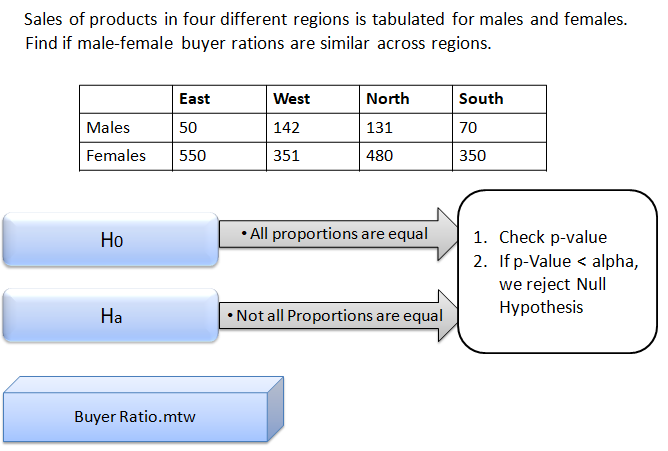

#### Solution:

#### Step 1 :  Set up the null and alternative hypothesis

In this question , we have to check whether male-female buyer rations are similar across regions.
We can perform test of independence using the Chi-Square test with the help of the Contigency table.


Null Hypothesis : There is no association or dependency between the gender based buyer rations across regions. 

Alternative Hypothesis : There is a significant association or dependency between the gender based buyer rations across regions. 

H0: The two categorical variables have no relationship.If H0 is true, each cell of the value in the contingency table above will contain a theoretical or expected frequency Eᵢⱼ, as opposed to the observed value Oᵢⱼ for each cell.

H1: There is a relationship between two categorical variables.If H1 is true, each cell of the value in the contingency table above will contain a Observed frequency Oᵢⱼ, as opposed to the Theoretical or Expected value Eᵢⱼ for each cell.

Deceiding the level of significance i.e. alpha is equal to 5 % =0.05
Here, We have decided on a 5% risk of concluding the two variables are independent when in reality they are not. We will have to perform the Chi-Square test as there are two qualitative variables that are independent i.e the rows of male and female. These two are independent.

The number of degrees of freedom of the χ2 independence test statistics :
df=(Number of rows -1)* (Number of columns -1)
df=(2-1) * (4-1)
df=1 * 3
df=3


#### Step 2 : Chi Square Test

In [11]:
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns

No_of_groups=4
#Creating Observed table

data=[['Males',50 ,142 ,131 ,70 ,'' ], ['Females',435 ,1523 ,1356 ,750,'' ],
      ['Total 2','' ,'' ,'' ,'','' ]] 

Observed_table=pd.DataFrame(data, columns = ['Observed Values','East', 'West','North','South',
                                             'Total 1']) 
Observed_table.set_index('Observed Values', inplace = True)


Observed_table['East']['Total 2']= Observed_table['East']['Males']+ Observed_table['East']['Females']
Observed_table['West']['Total 2']= Observed_table['West']['Males']+ Observed_table['West']['Females']
Observed_table['North']['Total 2']= Observed_table['North']['Males']+ Observed_table['North']['Females']
Observed_table['South']['Total 2']= Observed_table['South']['Males']+ Observed_table['South']['Females']
Observed_table['Total 1']['Males']= Observed_table['East']['Males']+ Observed_table['West']['Males']+Observed_table['North']['Males']+ Observed_table['South']['Males']
Observed_table['Total 1']['Females']= Observed_table['East']['Females']+ Observed_table['West']['Females']+Observed_table['North']['Females']+ Observed_table['South']['Females']
Observed_table['Total 1']['Total 2']= Observed_table['Total 1']['Males']+ Observed_table['Total 1']['Females']

print('Observed Table')
print('\n')
print(Observed_table)




#Now the table for expected frequencies
#By using the formula EF = Total # of obs for row * Total # of obs for col / Total number of obs
print('---------------------')

#Creating Expected Table
data=[['Males','' ,'' ,'' ,'' ,'' ], ['Females','' ,'','' ,'','' ], ['Total 2','485','1665','1487',' 820','' ]] 
Expected_table=pd.DataFrame(data, columns = ['Expected Values','East', 'West','North','South','Total 1']) 
Expected_table.set_index('Expected Values', inplace = True)


Expected_table['East']['Males']= (Observed_table['East']['Total 2']*Observed_table['Total 1']['Males'])/4457
Expected_table['East']['Females']= (Observed_table['East']['Total 2']*Observed_table['Total 1']['Females'])/4457


Expected_table['West']['Males']=(Observed_table['West']['Total 2']*Observed_table['Total 1']['Males'])/4457 
Expected_table['West']['Females']= (Observed_table['West']['Total 2']*Observed_table['Total 1']['Females'])/4457



Expected_table['North']['Males']=(Observed_table['North']['Total 2']*Observed_table['Total 1']['Males'])/4457 
Expected_table['North']['Females']= (Observed_table['North']['Total 2']*Observed_table['Total 1']['Females'])/4457


Expected_table['South']['Males']=(Observed_table['South']['Total 2']*Observed_table['Total 1']['Males'])/4457 
Expected_table['South']['Females']= (Observed_table['South']['Total 2']*Observed_table['Total 1']['Females'])/4457

Expected_table['Total 1']['Males'] = 393
Expected_table['Total 1']['Females'] = 4064
Expected_table['Total 1']['Total 2'] = 4457

print('Expected Table')
print('\n')
print(Expected_table)


print('---------------------------------------------')
#Significance level
alpha = 0.05

# Calcualtion of Chisquare

# create a pandas dataframe with the observed values
observed_values = pd.DataFrame({
    'East': [50, 435],
    'West': [142, 1523],
    'North': [131, 1356],
    'South': [70, 750]
}, index=['Males', 'Females'])

#Perform the chi-square test for independence
chi2, pval, dof, expected = chi2_contingency(observed_values)


print('\n')
# print the results
print("Chi-square statistic:",chi2)
print("P-value:",pval)
print("Degrees of Freedom:",dof)
print("Expected Value:",expected)


Observed Table


                East  West North South Total 1
Observed Values                               
Males             50   142   131    70     393
Females          435  1523  1356   750    4064
Total 2          485  1665  1487   820    4457
---------------------
Expected Table


                       East         West        North       South Total 1
Expected Values                                                          
Males             42.765313   146.812879   131.117568   72.304241     393
Females          442.234687  1518.187121  1355.882432  747.695759    4064
Total 2                 485         1665         1487         820    4457
---------------------------------------------


Chi-square statistic: 1.595945538661058
P-value 0.6603094907091882
Degrees of Freedom 3
Expected Value [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


#### Step 3 : Conclusion

Ans : As, we can observe that the value of p is  0.6603094907091882 which is significantly greater than that of the level of significance(alpha = 0.05). (p-value > alpha). Hence, we cannot reject the null hypothesis.
We can conclude there is no association or dependency between the gender based buyer rations across regions. 

### Q.4 TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences.(Minitab File: CustomerOrderForm.mtw)

#### Solution:

#### Step 1 : Assuming Null Hypothesis and Alternate Hypothesis

To analyze the data at a 5% significance level and help the manager draw appropriate inferences, we can use a hypothesis testing approach. Specifically, we can use a chi-squared test of independence to determine if there is a significant association between the location of the center and the percentage of defective customer order forms. This is because the order from can either be defective or not.There is no  other option. The null hypothesis is that the defective percentage is the same across all centers, and the alternative hypothesis is that there is a difference.

Null Hypothesis:
The defective percentage is the same across all centers.

Alternative Hypothesis:
The alternative hypothesis is that there is a difference.


To analyze the data at a 5% significance level and help the manager draw appropriate inferences in Python using the chi-square test, we will follow the below steps:

   1) Load the required libraries and read the data from the file.
   2) Create a contingency table to summarize the data.
   3) Perform the chi-square test on the contingency table.
   4) Interpret the test results.

#### Step 2 : Performing Chi-Square Test

In [98]:
# Step 1: Load the required libraries and read the data from the file

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

from tabulate import tabulate

# Read the data from the file
data = pd.read_csv("CustomerOrderForm.csv")

print('----------------------------------------------------------------------')
print('\n')
#value_counts() counts the number of records for every combination of unique values for every column
print(data['Phillippines'].value_counts(),'\n',data['Indonesia'].value_counts(),'\n',data['Malta'].value_counts(),'\n',data['India'].value_counts())

print('----------------------------------------------------------------------')
print('\n')






#Create a list of lists containing the data
contigency_table = [
    [271, 267, 269, 280],
    [29, 33, 31, 20]
]

#Create headers for the rows and columns
row_headers = ['Error Free', 'Defective']
column_headers = ['Phillippines', 'Indonesia', 'Malta', 'India']

#Generate the table using tabulate
table = tabulate(contingency_table, headers=column_headers, showindex=row_headers, tablefmt='fancy_grid')

#Print the table
print('Contigency Table:')
print(table)


print('----------------------------------------------------------------------')
print('\n')
# Step 3: Perform the chi-square test on the contingency table

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected values
chi2_statistic, p_value, dof, expected_values = chi2_contingency(contingency_table)

# Display the results of the chi-square test
print("Chi-Square Test")
print("Statistic:", chi2_statistic)
print("Degrees of Freedom:", dof)
print("p-value:", p_value)
#Create headers for the rows and columns
row_headers = ['Error Free', 'Defective']
column_headers = ['Phillippines', 'Indonesia', 'Malta', 'India']

#Generate the table using tabulate
table = tabulate(expected_values, headers=column_headers, showindex=row_headers, tablefmt='fancy_grid')

#Print the table
print('Expected Table:')
print(table)


#Level of Significance
alpha = 0.05
probability = 1-alpha
#Calculating the Critical Value 
cv = chi2.ppf(probability, dof)
print('Probability:',probability)
print('Critical Value:',cv)
print('Chi-Square Test Statistic:',chi2_statistic)
if chi2_statistic >= cv:
    print('We reject the null Hypothesis as the statistic value is greater than the critical value.')
else:
    print('We accept the null Hypothesis as the statistic value is less than the critical value.')



----------------------------------------------------------------------


Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64
----------------------------------------------------------------------


Contigency Table:
╒════════════╤════════════════╤═════════════╤═════════╤═════════╕
│            │   Phillippines │   Indonesia │   Malta │   India │
╞════════════╪════════════════╪═════════════╪═════════╪═════════╡
│ Error Free │            271 │         267 │     269 │     280 │
├────────────┼────────────────┼─────────────┼─────────┼─────────┤
│ Defective  │             29 │          33 │      31 │      20 │
╘════════════╧════════════════╧═════════════╧═════════╧═════════╛
----------------------------------------------------------------------


Chi-Square Test
Statistic: 3.8589606

#### Step 3 : Conclusion

Finally, let's move on to step 4 and interpret the test results.

Since the p-value of the test is greater than 0.05, we fail to reject the null hypothesis that the defective percentage is the same across all centers. Therefore, we do not have sufficient evidence to conclude that the defective percentage varies by center at the 5% significance level.
Also, to confirm the same , the value of test statistic is less than the critical value. Hereby, we confirm that the defective percentage is the same across all the centers.